# Tensorflow 2

- tensor가 sess.run없이 실행가능(eager execution)
- numpy 기능도 포함.

In [1]:
import tensorflow as tf

In [2]:
a = tf.constant([0, 1, 2])

b = tf.constant([10, 20, 30])



# eager execution

c = tf.add(a, b) # or c = a + b

print(c)



tf.Tensor([10 21 32], shape=(3,), dtype=int32)


In [7]:
type(tf.math.add(1,3))

tensorflow.python.framework.ops.EagerTensor

### Tensorflow1와 Tensorflow2의 차이
#### Tensorflow1
- 지연 실행 모드 (lazy execution) 가 기본 설정이므로 tf.add()처럼 계산 그래프을 만들어도 바로 실행되는 것이 아니며, Session을 생성하고 명시적으로 tf.Session().run() 을 호출하고 나서야 연산이 실행된다.
- 텐서플로의 연산은 데이터 플로우 그래프로 구성되서, 그래프를 실행하기 전에 초기화를 해줘야 그 값이 변수에 지정이 된다.(The Session graph is empty) 
- 변수를 Session 에서 실행시키기 전에 tf.global_variables_initializer() 를 먼저 호출해서 변수를 초기화(initialization) 해주어야 한다.
- session의 variable과 constant그리고 입력을 받는 input을 가진 그래프(추상구문트리)를 생성
- 전역 namespcae에 크게 의존 -> session : 그래프에 노드에 변수값 초기화

출처: https://rfriend.tistory.com/552#recentComments [R, Python 분석과 프로그래밍의 친구 (by R Friend)]
#### TensorFlow 2
- 즉시 실행 모드 (eager execution) 가 기본 설정이므로 하면 tf.add()처럼 계산 그래프을 만들면 Session생성 없이 function함수가 연산을 즉시 실행.
- placeholder대신 입력값을 function에 바로 넣어서 실행됨
- numpy()메소드를 사용해서 numpy array로 변환 할 수 있음
출처: https://rfriend.tistory.com/552#recentComments [R, Python 분석과 프로그래밍의 친구 (by R Friend)]
![](https://t1.daumcdn.net/cfile/tistory/99549D435F3E24D721)

### 오토그래프
- 오토그래프(AutoGraph)는 tf.function안에 기본으로 활성화
- 파이썬의 즉시 실행 코드를 그래프 호환 텐서플로 연산으로 변환
- if, for, while 같은 제어 흐름이 포함

### tf.function
- tensorflow2에서는 tf.function()데코레이터로 파이썬 함수를 감쌀 수 있다.
- tensorflow가 이 함수를 하나의 그래프로 실행하기 위해 JIT컴파일을 한다.

In [58]:
@tf.function
def f(x):
    while tf.reduce_sum(x) > 1:
        tf.print(x)
        x = tf.tanh(x)
    return x

In [73]:
tf.reduce_sum(tf.tanh(np.array([4,4,4,4,4]).astype('float32')))

<tf.Tensor: shape=(), dtype=float32, numpy=4.996646>

In [77]:
f(np.array([0,1,0,1,0]).astype('float32'))

[0 1 0 1 0]
[0 0.761594176 0 0.761594176 0]
[0 0.64201504 0 0.64201504 0]
[0 0.566270053 0 0.566270053 0]
[0 0.512614727 0 0.512614727 0]


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.        , 0.47197998, 0.        , 0.47197998, 0.        ],
      dtype=float32)>

In [53]:
tf_add = tf.function(add_func)

In [54]:
tf.add(10,20)

<tf.Tensor: shape=(), dtype=int32, numpy=30>

In [57]:
print(tf.autograph.to_code(add_func))

def tf__add_func(x, y):
    with ag__.FunctionScope('add_func', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (ag__.ld(x) + ag__.ld(y))
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



### Eager Execution
- 텐서플로의 즉시 실행은 그래프를 생성하지 않고 함수를 바로 실행하는 명령형 프로그래밍 환경이다. 나중에 실행하기 위해 계산가능한 그래프를 생성하는 대신에 계산값을 즉시 알려주는 연산
- tf.Tensor 객체는 계산 그래프에 있는 노드를 가르키는 간접 핸들(symbolic handle) 대신에 구체적인 값을 참조

#### - NumPy 연산에 tf.Tensor를 매개변수로 사용가능

In [78]:
np.unique(tf.random.normal((10,2)))

array([-2.4141345 , -1.3880106 , -1.1433402 , -1.1086129 , -0.99777895,
       -0.83713937, -0.803498  , -0.7241749 , -0.59514505, -0.58173805,
        0.08261746,  0.0877093 ,  0.61877215,  0.70635504,  0.8192558 ,
        0.996908  ,  1.0203754 ,  1.4040117 ,  1.7090586 ,  2.0319257 ],
      dtype=float32)

#### - 텐서플로 수학 연산은 파이썬 객체와 NumPy 배열을 tf.Tensor 객체로 변환

In [88]:
a = tf.constant([[1, 2],
                 [3, 4]])
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [79]:
print(tf.add(a, 1))

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


#### - 즉시 실행의 가장 큰 이점은 모델을 실행하는 동안에도 호스트 언어(for, while, print, ...)의 모든 기능을 활용

In [89]:
def fizzbuzz(max_num):
    counter = tf.constant(0)
    max_num = tf.convert_to_tensor(max_num)
    for num in range(1, max_num.numpy()+1):
        num = tf.constant(num)
        if int(num % 3) == 0 and int(num % 5) == 0:
            print('FizzBuzz')
        elif int(num % 3) == 0:
            print('Fizz')
        elif int(num % 5) == 0:
            print('Buzz')
        else:
            print(num.numpy())
        counter += 1

In [91]:
fizzbuzz(10)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz


### eager training

### 그래디언트 계산
- 자동 미분은 인공 신경망 훈련을 위한 역전파와 같은 기계학습 알고리즘을 구현하는데 유용
-  즉시 실행을 사용하는 동안에는, 나중에 그래디언트를 계산하는 연산을 추적하기 위해 tf.GradientTape를 사용

- Gradient Tape 연산 과정
    - 매번 실행될 때 서로 다른 연산이 수행될 수 있기 때문에 모든 정방향(forward-pass) 연산은 "tape"에 기록
    - 그다음 tape를 거꾸로 돌려 그래디언트를 계산한 후 tape를 폐기
   

In [94]:
w = tf.Variable([[1.0]])
with tf.GradientTape() as tape:
    loss = w * w
    
grad = tape.gradient(loss,w)
print(grad)

tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


In [95]:
from tensorflow.keras.datasets import mnist 

In [99]:
(mnist_images, mnist_labels), _ = mnist.load_data()

In [104]:
mnist_images[...,tf.newaxis].shape

(60000, 28, 28, 1)

In [146]:
(mnist_images[...,tf.newaxis]).shape

(60000, 28, 28, 1)

In [147]:
dataset = tf.data.Dataset.from_tensor_slices(
  (tf.cast(tf.expand_dims(mnist_images[...,tf.newaxis]/255,1), tf.float32),
   tf.cast(mnist_labels,tf.int64)))

In [148]:
mnist_images[...,tf.newaxis].shape

(60000, 28, 28, 1)

In [186]:
# 모델 생성
mnist_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16,[3,3], activation='relu',
                         input_shape=(28, 28, 1)),
  tf.keras.layers.Conv2D(16,[3,3], activation='relu'),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10)
])

In [187]:
for images,labels in dataset.take(1):
    print("로짓: ", mnist_model(images[0:1]).numpy())

로짓:  [[ 0.00295378  0.00114531  0.03997926 -0.02885807 -0.03444983  0.03002467
   0.02384677 -0.01580647  0.01646145 -0.04307278]]


In [188]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_history = []

In [189]:
def train_step(images, labels):
    with tf.GradientTape() as tape:
        logits = mnist_model(images, training=True)


        loss_value = loss_object(labels, logits)

    loss_history.append(loss_value.numpy().mean())
    grads = tape.gradient(loss_value, mnist_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables))

In [190]:
def train():
    for epoch in range(3):
        for (batch, (images, labels)) in enumerate(dataset.take(200)):
            train_step(images, labels)
        print ('에포크 {} 종료'.format(epoch))

In [191]:
train()

에포크 0 종료
에포크 1 종료
에포크 2 종료


In [43]:
from tensorflow.keras.layers import Input

In [51]:
print(type(tf.convert_to_tensor(np.array(1))))

print(type(tf.compat.v1.constant(0)))

print(type(tf.constant(0)))


input_image = Input(shape=(10, 10, 3))

print(type(input_image))

print(type(tf.Variable(0)))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>


## tensorflow 2.x에서 tensorflow 1.x 사용하기

In [20]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior

<function tensorflow.python.compat.v2_compat.disable_v2_behavior()>

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Tensor

In [22]:
a = tf.constant([1,2,3],dtype=tf.int32)
print(a)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [23]:
ndr = np.array([1,2,3])
tensor = tf.constant(ndr)
print(tensor)

tf.Tensor([1 2 3], shape=(3,), dtype=int64)


shape 보기

In [24]:
print(tensor.shape)


(3,)


data type 확인

In [25]:
print(tensor.dtype)

<dtype: 'int64'>


data type 변환

In [26]:
tensor = tf.cast(tensor,tf.float32)
print(tensor.dtype)

<dtype: 'float32'>


numpy로 바꾸기

In [27]:
tensor_numpy = tensor.numpy()
print(tensor_numpy)

tensor_numpy = np.array(tensor)
print(tensor_numpy)

[1. 2. 3.]
[1. 2. 3.]


난수 생성

6


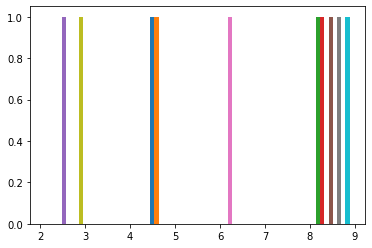

In [28]:
uniform_random = tf.random.uniform([10,1],maxval=10,dtype=tf.int32)
bins = np.unique(uniform_random.numpy()).shape
bins = np.squeeze(bins)

print(bins)
plt.hist(uniform_random,bins=bins)
plt.show()

(9998,)


(array([  2.,   3.,   0.,   2.,   0.,   0.,   1.,   6.,   7.,   8.,   3.,
          7.,  11.,  13.,  10.,  10.,  22.,  27.,  32.,  36.,  32.,  40.,
         55.,  58.,  55.,  68.,  89.,  94., 124., 117., 108., 157., 160.,
        152., 167., 153., 188., 223., 244., 242., 248., 283., 253., 282.,
        268., 238., 273., 302., 290., 262., 286., 270., 269., 275., 293.,
        263., 249., 231., 229., 203., 195., 173., 182., 166., 165., 139.,
        120., 116.,  92.,  83.,  76.,  65.,  64.,  53.,  47.,  47.,  31.,
         33.,  17.,  21.,  27.,  15.,  19.,  12.,  15.,   7.,   6.,   5.,
          1.,   4.,   4.,   1.,   0.,   3.,   0.,   1.,   0.,   1.,   0.,
          1.]),
 array([-3.5489333 , -3.4756746 , -3.402416  , -3.3291576 , -3.255899  ,
        -3.1826403 , -3.1093817 , -3.036123  , -2.9628644 , -2.889606  ,
        -2.8163474 , -2.7430887 , -2.66983   , -2.5965714 , -2.523313  ,
        -2.4500544 , -2.3767958 , -2.3035371 , -2.2302785 , -2.1570199 ,
        -2.0837615 , -2.01

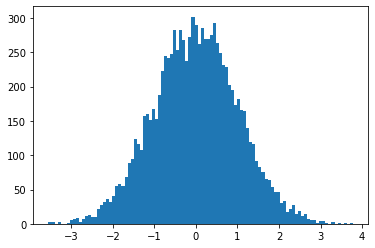

In [29]:
normal_random = tf.random.normal([10000,1])
print(np.unique(normal_random.numpy()).shape)
plt.hist(normal_random.numpy(),bins=100)

## 데이터 불러오기

In [30]:
from tensorflow.keras import datasets

In [31]:
mnist = datasets.mnist

In [34]:
(train_x, train_y),(test_x, test_y) = mnist.load_data()

In [35]:
train_x.shape

(60000, 28, 28)

In [36]:
image = train_x[0]

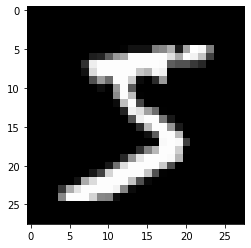

In [37]:
plt.imshow(image,cmap='gray')
plt.show()

## channel 관련
- [Batch Size, Height, Width, Channel]
- GrayScale이면 1, RGB이면 3으로 만들어줘야함

데이터 차원수 늘리기(numpy)<br>
np.expand_dims(data,axis)
- 0 이면 맨앞
- 1 이면 두번째
- 2 이면 3번째
- -1 이면 맨끝

In [38]:
print(np.expand_dims(train_x,0).shape)
print(np.expand_dims(train_x,1).shape)
print(np.expand_dims(train_x,2).shape)
print(np.expand_dims(train_x,-1).shape)

(1, 60000, 28, 28)
(60000, 1, 28, 28)
(60000, 28, 1, 28)
(60000, 28, 28, 1)


- Tensorflow로 차원수 늘리기

In [39]:
new_train_x = tf.expand_dims(train_x,-1)
print(new_train_x.shape)

new_train_x = train_x[tf.newaxis,...]
print(new_train_x.shape)

(60000, 28, 28, 1)
(1, 60000, 28, 28)


In [40]:
train_y.shape

(60000,)

## Onehot Encoding

In [41]:
from tensorflow.keras.utils import to_categorical

In [42]:
to_categorical(train_y,10)[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [43]:
1, 28,28, 1

(1, 28, 28, 1)

## Feature Extraction

![](https://mblogthumb-phinf.pstatic.net/20160909_182/cjh226_1473414664622BSdJS_PNG/fig1.png?type=w2)

## Convolution
- filters: layer에서 나갈 때 몇개의 filter를 만들 것 인지
- kernel_size: filter(weight)의 사이즈
- strides 
- padding : zero padding["same"], "VALUE"는 padding이 없고, "SAME"은 Padding이 있음(사이즈에도 영향을 준다.)
- activation: Activation Function을 만들것인지, 당장 설정 안해도 Layer층을 따로 만들 수 있음.


tensorflow가 keras를 인수해서 keras를 통해 구현 할 수 있게 됨

## Visualization

In [44]:
image = tf.cast(image,dtype=tf.float32)
print(image.dtype)

<dtype: 'float32'>


In [45]:
image = np.reshape(image,[1,28,28,1])
print(image.shape)

(1, 28, 28, 1)


In [46]:
layer = tf.keras.layers.Conv2D(3,3,1,padding="SAME") 

In [47]:
output = layer(image)

In [48]:
output.shape 

TensorShape([1, 28, 28, 3])

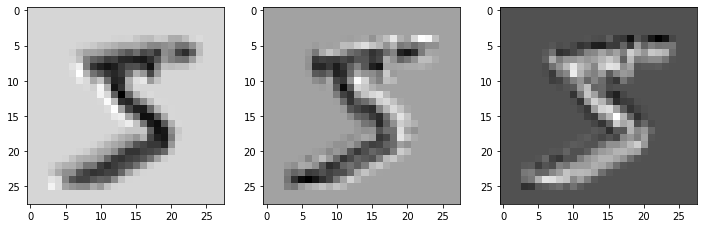

In [50]:
fig = plt.figure(figsize=[12,8])
for i in range(3):
    fig.add_subplot(1, 3, i+1)
    plt.imshow(output[0,:,:,i].numpy(),'gray')
plt.show()

- weight 불러오기

In [51]:
weight = layer.get_weights()
print("weight:",layer.get_weights()[0].shape)
print("bias:",layer.get_weights()[1].shape)

weight: (3, 3, 1, 3)
bias: (3,)


In [52]:
print(weight[0].shape)

(3, 3, 1, 3)


In [53]:
image.shape

(1, 28, 28, 1)

In [105]:
weight[0].shape

(3, 3, 1, 3)

(3, 3, 1, 3)


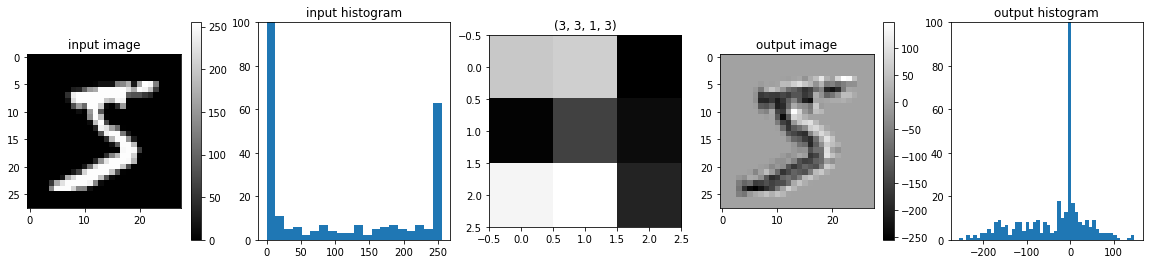

In [111]:
i = 1
plt.figure(figsize=(20,4))
plt.subplot(151)
plt.title("input image")
plt.imshow(image[0,:,:,0],'gray')
plt.colorbar()

plt.subplot(152)
plt.title("input histogram")
plt.hist(image.ravel(),bins=20)
plt.ylim(0,100)

plt.subplot(153)
plt.title(weight[0].shape)
print(weight[0].shape)
plt.imshow(weight[0][:,:,0,i],'gray')

plt.subplot(154)
plt.title("output image")
plt.imshow(output[0,:,:,i],'gray')
plt.colorbar()

plt.subplot(155)
plt.title("output histogram")
plt.hist(output[0,:,:,i].numpy().ravel(),bins=50,)
plt.ylim(0,100)
plt.show()

![](https://miro.medium.com/max/1400/1*ONiC8WDSTrYsqjDD9hC-6w.png)

### Activation Function

#### RELU

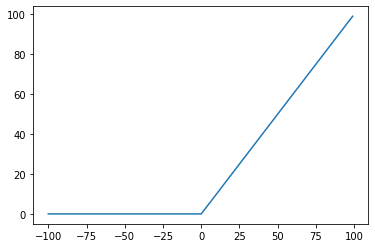

In [60]:
x = np.arange(-100,100)
z = np.maximum(x,0)
plt.plot(x,z)
plt.show()

In [61]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)

In [62]:
output.shape 

TensorShape([1, 28, 28, 3])

## channel마다 특정 강조되는 부분만 추출

(0, 100)

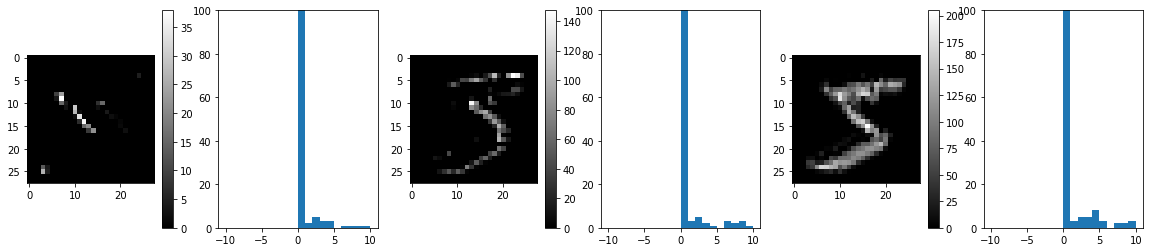

In [84]:
plt.figure(figsize=(20,4))
plt.subplot(161)
plt.imshow(act_output[0,:,:,0],'gray')
plt.colorbar()

plt.subplot(162)
plt.hist(act_output[0,:,:,0].numpy().ravel(),bins=20,range=(-10,10))
plt.ylim(0,100)

plt.subplot(163)
plt.imshow(act_output[0,:,:,1],'gray')
plt.colorbar()

plt.subplot(164)
plt.hist(act_output[0,:,:,1].numpy().ravel(),bins=20,range=(-10,10))
plt.ylim(0,100)

plt.subplot(165)
plt.imshow(act_output[0,:,:,2],'gray')
plt.colorbar()

plt.subplot(166)
plt.hist(act_output[0,:,:,2].numpy().ravel(),bins=20,range=(-10,10))
plt.ylim(0,100)

In [86]:
pool_layer = tf.keras.layers.MaxPool2D(2,2,padding="SAME")
pool_output = pool_layer(act_output)

(0, 100)

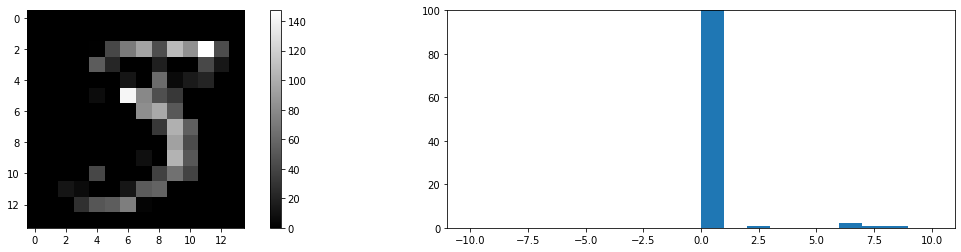

In [94]:
i = 1
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.imshow(pool_output[0,:,:,i],'gray')
plt.colorbar()

plt.subplot(122)
plt.hist(pool_output[0,:,:,i].numpy().ravel(),bins=20,range=(-10,10))
plt.ylim(0,100)

### references
https://rfriend.tistory.com/552